In [ ]:
!pip install emoji

     |████████████████████████████████| 133kB 5.4MB/s 


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import emoji
#import regex
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
     "wordnet",
 ])
from nltk.sentiment.vader import SentimentIntensityAnalyzer


vader=SentimentIntensityAnalyzer()


def extract_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list



[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
data = pd.read_csv("/content/sample_data/data.csv") 


In [ ]:
data.head()

,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12 December 2018,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17 November 2018,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27 January 2019,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2 May 2019,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24 May 2019,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [ ]:
data.shape


(5010, 11)

In [ ]:
vart=[]
for i in data.review_rating:
    vart.append(i.split(' out of')[0])
data.review_rating=vart

In [ ]:
data.head()

,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12 December 2018,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17 November 2018,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27 January 2019,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase
3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2 May 2019,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24 May 2019,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [ ]:
data.review_rating.value_counts()

5.0    3731
4.0     720
1.0     319
3.0     153
2.0      87
Name: review_rating, dtype: int64

(array([ 153.,    0.,  319.,    0.,    0., 3731.,    0.,  720.,    0.,
          87.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

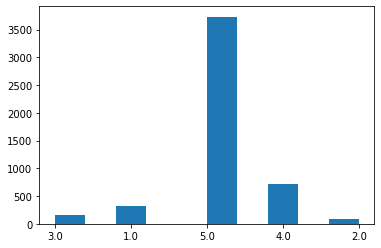

In [ ]:
plt.hist(data.review_rating)

In [ ]:
print(data.review_text.isna().value_counts())
data= data[data['review_text'].notnull()]
print(data.review_text.isna().value_counts())


False    5007
True        3
Name: review_text, dtype: int64
False    5007
Name: review_text, dtype: int64


In [ ]:
count=0
pos=[]
neg=[]
nue=[]
com=[]

for i in data.review_text:
    try:
       vp=vader.polarity_scores(i)
       pos.append(vp['pos'])
       neg.append(vp['neg'])
       nue.append(vp['neu'])
       com.append(vp['compound'])
       count=count+1
    except:
      fat=0
print(len(pos))
data['positive']=pos
data['negative']=neg
data['neutral']=nue
data['compound']=com
data.head()





5007


,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,positive,negative,neutral,compound
0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12 December 2018,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",0.000,0.000,1.000,0.0000
1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17 November 2018,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,0.073,0.253,0.674,-0.8685
2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27 January 2019,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,0.598,0.000,0.402,0.9246
3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2 May 2019,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,0.145,0.074,0.781,0.7840
4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24 May 2019,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,0.203,0.054,0.743,0.9287


In [ ]:
data['final_output']=data[['positive','negative','neutral']].idxmax(axis=1)

In [ ]:
data.head()

,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,positive,negative,neutral,compound,final_output
0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12 December 2018,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",0.000,0.000,1.000,0.0000,neutral
1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17 November 2018,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,0.073,0.253,0.674,-0.8685,neutral
2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27 January 2019,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,0.598,0.000,0.402,0.9246,positive
3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2 May 2019,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,0.145,0.074,0.781,0.7840,neutral
4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24 May 2019,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,0.203,0.054,0.743,0.9287,neutral


# Regular expression to find emoji's


In [ ]:
def add_space_between_emojies(text):
  # Ref: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1#gistcomment-3208085
  # Ref: https://en.wikipedia.org/wiki/Unicode_block
  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
  text = re.sub(EMOJI_PATTERN, r' \1 ', text)
  return text

In [ ]:
#for i in data.review_text:
print(add_space_between_emojies(data.review_text[0]))

NOTE:


In [ ]:
print(data.final_output.value_counts())

one_rating_output =  data['review_rating']=="1.0"
two_rating_output =  data['review_rating']=="2.0"
three_rating_output =  data['review_rating']=="3.0"
four_rating_output =  data['review_rating']=="4.0"
five_rating_output =  data['review_rating']=="5.0"



neutral     2788
positive    2136
negative      83
Name: final_output, dtype: int64


# Plotting reviews according to ratings

(array([277.,   0.,   0.,   0.,   0.,  37.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

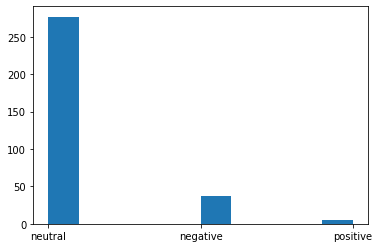

In [ ]:
plt.hist(data[one_rating_output].final_output)

(array([80.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

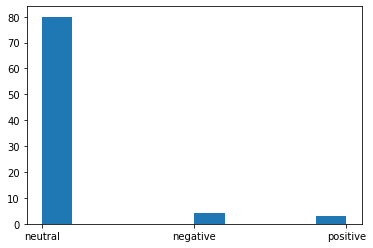

In [ ]:
plt.hist(data[two_rating_output].final_output)

(array([129.,   0.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,   9.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

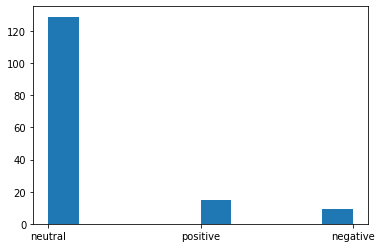

In [ ]:
plt.hist(data[three_rating_output].final_output)

(array([450.,   0.,   0.,   0.,   0., 257.,   0.,   0.,   0.,  11.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

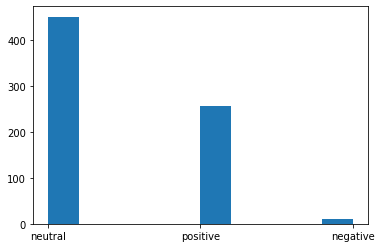

In [ ]:
plt.hist(data[four_rating_output].final_output)

(array([1856.,    0.,    0.,    0.,    0., 1852.,    0.,    0.,    0.,
          22.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

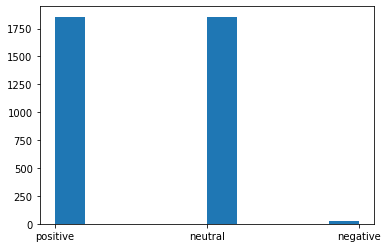

In [ ]:
plt.hist(data[five_rating_output].final_output)

# NKTK for text cleaning

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

def clean_function(txt):
  raw_docs=txt
  #raw_docs = [doc.lower() for doc in raw_docs]

  tokenized_docs = word_tokenize(raw_docs)
  #print(tokenized_docs)

  regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html

  #tokenized_docs_no_punctuation = []
  new_review = []
  for token in tokenized_docs:
      new_token = regex.sub(u'', token)
      if not new_token == u'':
         new_review.append(new_token)
    
  #tokenized_docs_no_punctuation.append(new_review)

  tokenized_docs_no_stopwords = []

  new_term_vector = []
  for word in new_review:
      if not word in stopwords.words('english'):
        new_term_vector.append(word)
    
  #tokenized_docs_no_stopwords.append(new_term_vector)

  #print(new_term_vector)

  final_doc = []
  for word in new_term_vector:
        #final_doc.append(porter.stem(word))
      #print(word)
      final_doc.append(wordnet.lemmatize(word))
  #print(final_doc)
  return final_doc




issue with stop words

In [ ]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

#print(listToString(clean_function(data.content[0])))


#vader.polarity_scores(listToString(clean_function(data.content[0])))

In [ ]:
filtered_text=[]
for i in data.review_text:
  filtered_text.append(listToString(clean_function(i)))

data['filtered_text']=filtered_text
data.head()

,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,positive,negative,neutral,compound,final_output,filtered_text
0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12 December 2018,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",0.000,0.000,1.000,0.0000,neutral,NOTE
1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17 November 2018,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,0.073,0.253,0.674,-0.8685,neutral,Very bad experience iPhone xr phone Back camer...
2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27 January 2019,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,0.598,0.000,0.402,0.9246,positive,Amazing phone amazing camera coming iPhone 7 p...
3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2 May 2019,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,0.145,0.074,0.781,0.7840,neutral,So I got iPhone XR today The product look amaz...
4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24 May 2019,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,0.203,0.054,0.743,0.9287,neutral,I android user life I decided try iPhone XR iO...


In [ ]:
count=0
pos=[]
neg=[]
nue=[]
com=[]

for i in data.filtered_text:
    try:
       vp=vader.polarity_scores(i)
       pos.append(vp['pos'])
       neg.append(vp['neg'])
       nue.append(vp['neu'])
       com.append(vp['compound'])
       count=count+1
    except:
      fat=0
print(len(pos))
data['positive_filtered']=pos
data['negative_filtered']=neg
data['neutral_filtered']=nue
data['compound_filtered']=com


5007


In [ ]:
data['filtered_final_output']=data[['positive_filtered','negative_filtered','neutral_filtered']].idxmax(axis=1)

In [ ]:
data.head()

,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,positive,negative,neutral,compound,final_output,filtered_text,positive_filtered,negative_filtered,neutral_filtered,compound_filtered,filtered_final_output
0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12 December 2018,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",0.000,0.000,1.000,0.0000,neutral,NOTE,0.000,0.000,1.000,0.0000,neutral_filtered
1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17 November 2018,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,0.073,0.253,0.674,-0.8685,neutral,Very bad experience iPhone xr phone Back camer...,0.104,0.349,0.548,-0.8588,neutral_filtered
2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27 January 2019,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,0.598,0.000,0.402,0.9246,positive,Amazing phone amazing camera coming iPhone 7 p...,0.691,0.000,0.309,0.9246,positive_filtered
3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2 May 2019,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,0.145,0.074,0.781,0.7840,neutral,So I got iPhone XR today The product look amaz...,0.225,0.095,0.681,0.8316,neutral_filtered
4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24 May 2019,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,0.203,0.054,0.743,0.9287,neutral,I android user life I decided try iPhone XR iO...,0.330,0.048,0.622,0.9423,neutral_filtered


In [ ]:
one_rating_output =  data['review_rating']=="1.0"
two_rating_output =  data['review_rating']=="2.0"
three_rating_output =  data['review_rating']=="3.0"
four_rating_output =  data['review_rating']=="4.0"
five_rating_output =  data['review_rating']=="5.0"

neg_reviews=data.filtered_final_output=="negative_filtered"


#print(data[neg_reviews].filtered_text)
data[neg_reviews].to_excel("/content/sample_data/final.xlsx")

print(data.iloc[2287:2289,:].review_rating)

2287    3.0
2288    5.0
Name: review_rating, dtype: object


# filtered text histogram

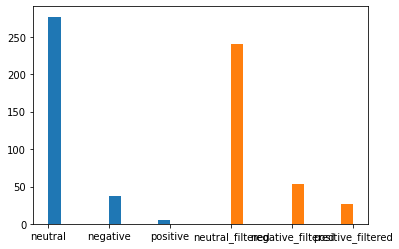

In [ ]:
plt.hist(data[one_rating_output].final_output)
plt.hist(data[one_rating_output].filtered_final_output)
plt.show()


(array([69.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0., 10.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

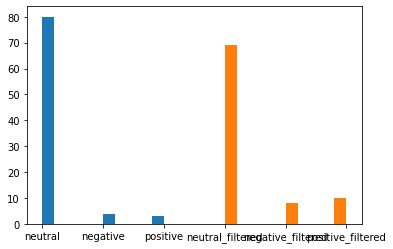

In [ ]:
plt.hist(data[two_rating_output].final_output)
plt.hist(data[two_rating_output].filtered_final_output)

(array([116.,   0.,   0.,   0.,   0.,  24.,   0.,   0.,   0.,  13.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

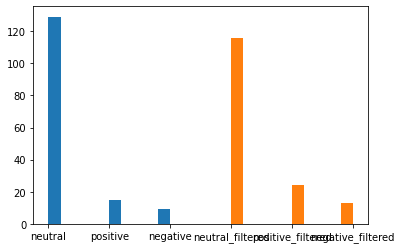

In [ ]:
plt.hist(data[three_rating_output].final_output)
plt.hist(data[three_rating_output].filtered_final_output)

(array([341.,   0.,   0.,   0.,   0., 361.,   0.,   0.,   0.,  16.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

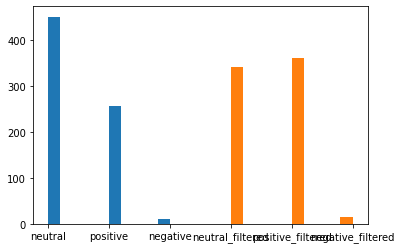

In [ ]:
plt.hist(data[four_rating_output].final_output)
plt.hist(data[four_rating_output].filtered_final_output)

(array([2374.,    0.,    0.,    0.,    0., 1321.,    0.,    0.,    0.,
          35.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

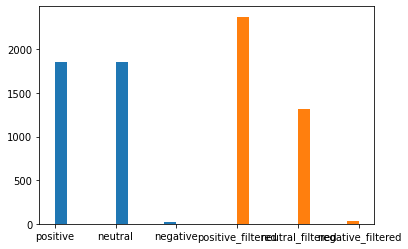

In [ ]:
plt.hist(data[five_rating_output].final_output)
plt.hist(data[five_rating_output].filtered_final_output)

# What exactly people are talking about

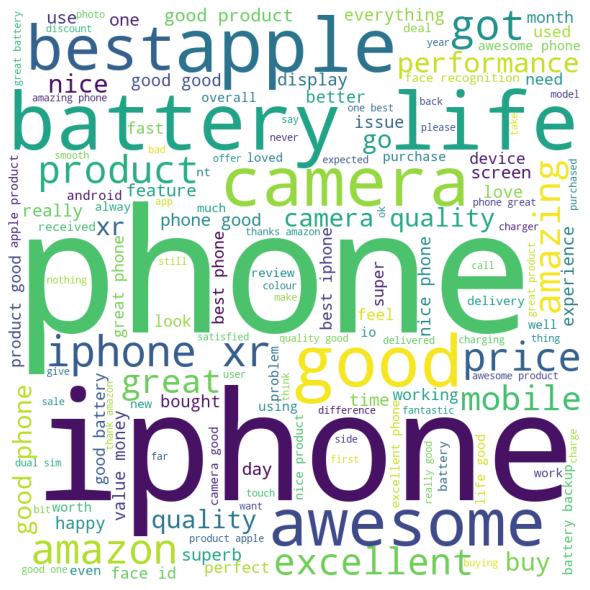

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in data.filtered_text:
      
    # typecaste each val to string
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowneg_reviews=data.filtered_final_output=="negative_filtered"
ercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
print(comment_words)

note very bad experience iphone xr phone back camera found defective non functional amazon careless i nt got response confirmation replacing i hanging damaged piece worth 91000 rupee amazing phone amazing camera coming iphone 7 plus great service amazon so i got iphone xr today the product look amazing but unfortunately face id working ’ glitch front camera ’ portrait mode that ’ fine may happen but ’ fine pathetic service provided amazon apple firstly amazon take responsibility product sold talking giant apple called market leader went service centre running diagnostic solution came sending phone bangalore repair like sending new phone repair practical solution company provides charging bomb product and also mention amazonin authorised apple reseller i guess issue escalated consumer court thank amazon apple i android user life i decided try iphone xr ios loving camera battery life absolute joy it one month since i got phone i loving face id work flawlessly even dark dual sim function 

In [ ]:
specs=['service','worst','cable','quality','good','awesome','iphone','face recognition','performance','amazon','price','screen','features','display','camera','battery','heat','charging','miss','misplace','face id','hang']
talks=[]
str=''
for i in data.filtered_text:
  str=''

  for j in specs:
    if j in i:
      str=str+" "+j
    
  talks.append(str)


data['talks']=talks
cp=0
for i in data.talks:
  if(len(i)>2):
    cp=cp+1
print(cp)

2106


In [ ]:
neg_reviews=data.filtered_final_output=="negative_filtered"

data[neg_reviews].to_excel("/content/sample_data/final.xlsx")


In [ ]:
camera_output =  ["camera" in a for a in data['talks']]
battery_output =  ["battery" in a for a in data['talks']]
performance_output =  ["performance" in a for a in data['talks']]

heat_output =  ["heat" in a for a in data['talks']]
charging_output =  ["charging" in a for a in data['talks']]
screen_output =  ["screen" in a for a in data['talks']]

display_output =  ["display" in a for a in data['talks']]
hang_output =  ["hang" in a for a in data['talks']]
price_output =  ["price" in a for a in data['talks']]


service_output =  ["service" in a for a in data['talks']]
worst_output =  ["worst" in a for a in data['talks']]
cable_output =  ["cable" in a for a in data['talks']]
quality_output =  ["quality" in a for a in data['talks']]



In [ ]:

five_camera=data[camera_output]
five_battery=data[battery_output]
five_performance=data[performance_output]

five_heat=data[heat_output]
five_charging=data[charging_output]
five_screen=data[screen_output]

five_display=data[display_output]
five_hang=data[hang_output]
five_price=data[price_output]

five_service=data[service_output]
five_worst=data[worst_output]
five_cable=data[cable_output]
five_quality=data[quality_output]

camera_rates=five_camera['review_rating']=="5.0"
battery_rates=five_battery['review_rating']=="5.0"
performance_rates=five_performance['review_rating']=="5.0"

heat_rates=five_heat['review_rating']=="5.0"
charging_rates=five_charging['review_rating']=="5.0"
screen_rates=five_screen['review_rating']=="5.0"


display_rates=five_display['review_rating']=="5.0"
hang_rates=five_hang['review_rating']=="5.0"
price_rates=five_price['review_rating']=="5.0"

worst_rates=five_worst['review_rating']=="5.0"
service_rates=five_service['review_rating']=="5.0"
cable_rates=five_cable['review_rating']=="5.0"
quality_rates=five_quality['review_rating']=="5.0"

#print(five_camera[camera_rates].value_counts())




In [ ]:
neg_reviews=five_worst.filtered_final_output=="negative_filtered"

five_worst.to_excel("/content/sample_data/final.xlsx")


(array([ 60.,   0.,   0.,   0.,   0., 111.,   0.,   0.,   0.,   1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

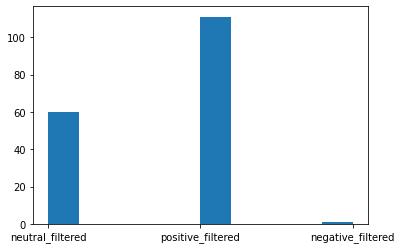

In [ ]:
five_rates=five['review_rating']=="5.0"
plt.hist(five[five_rates].filtered_final_output)

(array([ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

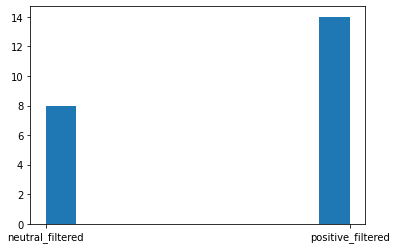

In [ ]:
five_rates=five['revifive_performanceew_rating']=="4.0"
plt.hist(five[five_rates].filtered_final_output)

In [ ]:
fp=0
for i in data.talks:
  if len(i) > 1:
    fp=fp+1

print(fp)

2001


In [ ]:
pk=data.review_rating=="1.0"
print(data[pk].filtered_final_output.value_counts())

neutral_filtered     240
negative_filtered     53
positive_filtered     26
Name: filtered_final_output, dtype: int64


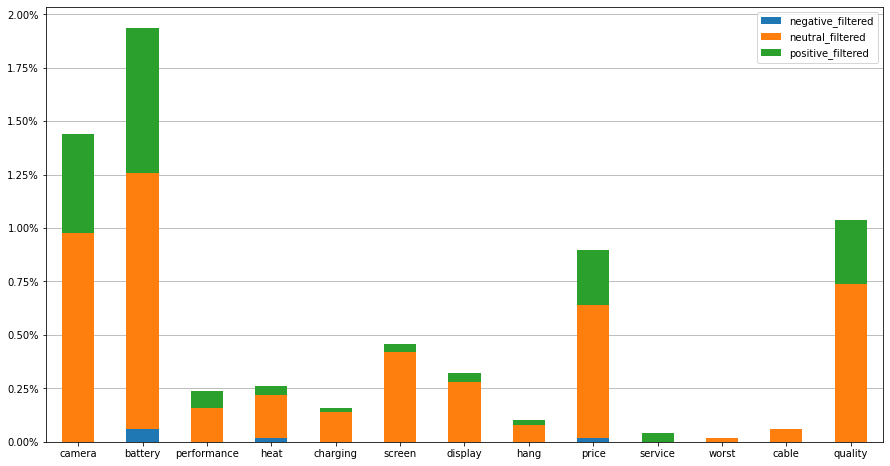

In [ ]:
 
# Create the pandas DataFrame
df = pd.DataFrame().reindex_like(data)
df['camera']=five_camera[camera_rates].filtered_final_output
df['battery']=five_battery[battery_rates].filtered_final_output
df['performance']=five_performance[performance_rates].filtered_final_output

df['heat']=five_heat[heat_rates].filtered_final_output
df['charging']=five_charging[charging_rates].filtered_final_output
df['screen']=five_screen[screen_rates].filtered_final_output


df['display']=five_display[display_rates].filtered_final_output
df['hang']=five_hang[hang_rates].filtered_final_output
df['price']=five_price[price_rates].filtered_final_output


df['service']=five_service[service_rates].filtered_final_output
df['worst']=five_worst[worst_rates].filtered_final_output
df['cable']=five_cable[cable_rates].filtered_final_output
df['quality']=five_quality[quality_rates].filtered_final_output


# print dataframe.


df

counts = df.iloc[:,24:].apply(lambda x: x.value_counts() / len(x)).transpose()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.show()

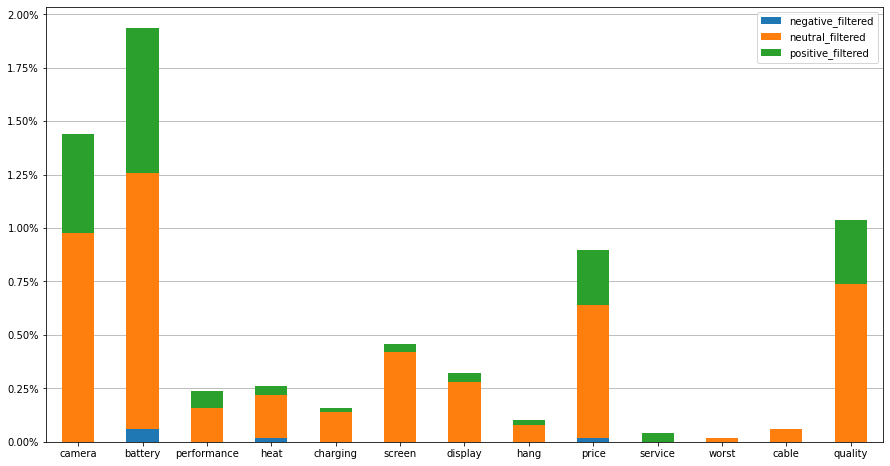

In [ ]:
camera_rates=five_camera['review_rating']=="4.0"
battery_rates=five_battery['review_rating']=="4.0"
performance_rates=five_performance['review_rating']=="4.0"

heat_rates=five_heat['review_rating']=="4.0"
charging_rates=five_charging['review_rating']=="4.0"
screen_rates=five_screen['review_rating']=="4.0"


display_rates=five_display['review_rating']=="4.0"
hang_rates=five_hang['review_rating']=="4.0"
price_rates=five_price['review_rating']=="4.0"

worst_rates=five_worst['review_rating']=="4.0"
service_rates=five_service['review_rating']=="4.0"
cable_rates=five_cable['review_rating']=="4.0"
quality_rates=five_quality['review_rating']=="4.0"
 
# Create the pandas DataFrame
df = pd.DataFrame().reindex_like(data)
df['camera']=five_camera[camera_rates].filtered_final_output
df['battery']=five_battery[battery_rates].filtered_final_output
df['performance']=five_performance[performance_rates].filtered_final_output

df['heat']=five_heat[heat_rates].filtered_final_output
df['charging']=five_charging[charging_rates].filtered_final_output
df['screen']=five_screen[screen_rates].filtered_final_output


df['display']=five_display[display_rates].filtered_final_output
df['hang']=five_hang[hang_rates].filtered_final_output
df['price']=five_price[price_rates].filtered_final_output
# print dataframe.

df['service']=five_service[service_rates].filtered_final_output
df['worst']=five_worst[worst_rates].filtered_final_output
df['cable']=five_cable[cable_rates].filtered_final_output
df['quality']=five_quality[quality_rates].filtered_final_output

df

counts = df.iloc[:,24:].apply(lambda x: x.value_counts() / len(x)).transpose()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.show()

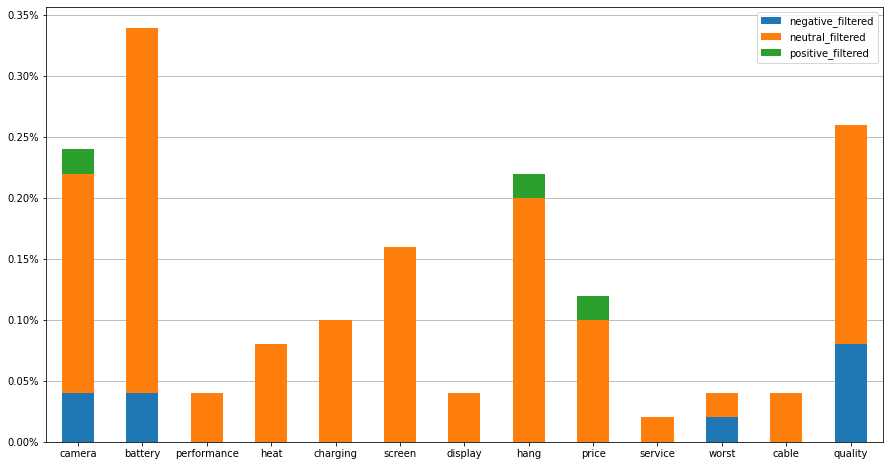

In [ ]:
camera_rates=five_camera['review_rating']=="3.0"
battery_rates=five_battery['review_rating']=="3.0"
performance_rates=five_performance['review_rating']=="3.0"

heat_rates=five_heat['review_rating']=="3.0"
charging_rates=five_charging['review_rating']=="3.0"
screen_rates=five_screen['review_rating']=="3.0"


display_rates=five_display['review_rating']=="3.0"
hang_rates=five_hang['review_rating']=="3.0"
price_rates=five_price['review_rating']=="3.0"

worst_rates=five_worst['review_rating']=="3.0"
service_rates=five_service['review_rating']=="3.0"
cable_rates=five_cable['review_rating']=="3.0"
quality_rates=five_quality['review_rating']=="3.0"
 
# Create the pandas DataFrame
df = pd.DataFrame().reindex_like(data)

df['camera']=five_camera[camera_rates].filtered_final_output
df['battery']=five_battery[battery_rates].filtered_final_output
df['performance']=five_performance[performance_rates].filtered_final_output

df['heat']=five_heat[heat_rates].filtered_final_output
df['charging']=five_charging[charging_rates].filtered_final_output
df['screen']=five_screen[screen_rates].filtered_final_output


df['display']=five_display[display_rates].filtered_final_output
df['hang']=five_hang[hang_rates].filtered_final_output
df['price']=five_price[price_rates].filtered_final_output

df['service']=five_service[service_rates].filtered_final_output
df['worst']=five_worst[worst_rates].filtered_final_output
df['cable']=five_cable[cable_rates].filtered_final_output
df['quality']=five_quality[quality_rates].filtered_final_output
# print dataframe.

counts = df.iloc[:,24:].apply(lambda x: x.value_counts() / len(x)).transpose()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.show()

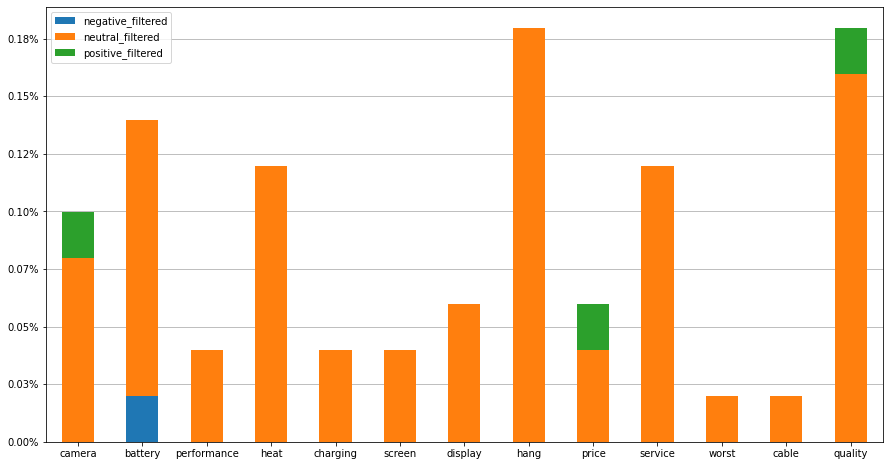

In [ ]:
camera_rates=five_camera['review_rating']=="2.0"
battery_rates=five_battery['review_rating']=="2.0"
performance_rates=five_performance['review_rating']=="2.0"

heat_rates=five_heat['review_rating']=="2.0"
charging_rates=five_charging['review_rating']=="2.0"
screen_rates=five_screen['review_rating']=="2.0"


display_rates=five_display['review_rating']=="2.0"
hang_rates=five_hang['review_rating']=="2.0"
price_rates=five_price['review_rating']=="2.0"

worst_rates=five_worst['review_rating']=="2.0"
service_rates=five_service['review_rating']=="2.0"
cable_rates=five_cable['review_rating']=="2.0"
quality_rates=five_quality['review_rating']=="2.0"
 
# Create the pandas DataFrame
df = pd.DataFrame().reindex_like(data)

df['camera']=five_camera[camera_rates].filtered_final_output
df['battery']=five_battery[battery_rates].filtered_final_output
df['performance']=five_performance[performance_rates].filtered_final_output

df['heat']=five_heat[heat_rates].filtered_final_output
df['charging']=five_charging[charging_rates].filtered_final_output
df['screen']=five_screen[screen_rates].filtered_final_output


df['display']=five_display[display_rates].filtered_final_output
df['hang']=five_hang[hang_rates].filtered_final_output
df['price']=five_price[price_rates].filtered_final_output

df['service']=five_service[service_rates].filtered_final_output
df['worst']=five_worst[worst_rates].filtered_final_output
df['cable']=five_cable[cable_rates].filtered_final_output
df['quality']=five_quality[quality_rates].filtered_final_output

counts = df.iloc[:,24:].apply(lambda x: x.value_counts() / len(x)).transpose()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.show()

In [ ]:
pk=data.review_rating=="1.0"
print(data[pk].filtered_final_output.value_counts())

neutral_filtered     240
negative_filtered     53
positive_filtered     26
Name: filtered_final_output, dtype: int64


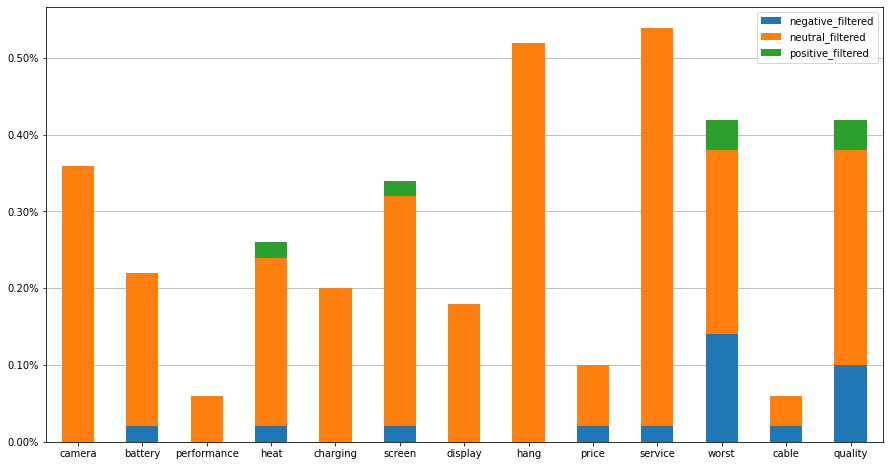

In [ ]:
camera_rates=five_camera['review_rating']=="1.0"
battery_rates=five_battery['review_rating']=="1.0"
performance_rates=five_performance['review_rating']=="1.0"


heat_rates=five_heat['review_rating']=="1.0"
charging_rates=five_charging['review_rating']=="1.0"
screen_rates=five_screen['review_rating']=="1.0"


display_rates=five_display['review_rating']=="1.0"
hang_rates=five_hang['review_rating']=="1.0"
price_rates=five_price['review_rating']=="1.0"

#five_camera[camera_rates].filtered_final_outputive_worst['review_rating']=="1.0"
worst_rates=five_worst['review_rating']=="1.0"
service_rates=five_service['review_rating']=="1.0"
cable_rates=five_cable['review_rating']=="1.0"
quality_rates=five_quality['review_rating']=="1.0"

 
# Create the pandas DataFrame
df = pd.DataFrame().reindex_like(data)
df['camera']=five_camera[camera_rates].filtered_final_output
df['battery']=five_battery[battery_rates].filtered_final_output
df['performance']=five_performance[performance_rates].filtered_final_output

df['heat']=five_heat[heat_rates].filtered_final_output
df['charging']=five_charging[charging_rates].filtered_final_output
df['screen']=five_screen[screen_rates].filtered_final_output


df['display']=five_display[display_rates].filtered_final_output
df['hang']=five_hang[hang_rates].filtered_final_output
df['price']=five_price[price_rates].filtered_final_output

df['service']=five_service[service_rates].filtered_final_output
df['worst']=five_worst.filtered_final_output
df['cable']=five_cable[cable_rates].filtered_final_output
df['quality']=five_quality[quality_rates].filtered_final_output

counts = df.iloc[:,24:].apply(lambda x: x.value_counts() / len(x)).transpose()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.show()

In [ ]:
neg_reviews=five_worst.filtered_final_output=="negative_filtered"

#five_worst.to_excel("/content/sample_data/final.xlsx")
print(five_worst.filtered_final_output.value_counts())
print(df.worst.value_counts())

neutral_filtered     12
negative_filtered     7
positive_filtered     2
Name: filtered_final_output, dtype: int64
neutral_filtered    1
Name: worst, dtype: int64


In [ ]:
five_worst=data[worst_output]

print((five_worst[worst_rates].filtered_text).value_counts())

Battery quality worst I honor 8c give 2 day backup phone last 12 hour medium usage fast charger take tradatitional 3 hour full charging u want waste money go u r brand conscious buy brand phone much better configuration almost half price    1
Name: filtered_text, dtype: int64
